In [1]:
from __future__ import division
import pyPamtra
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

PAMTRA FORTRAN LIBRARY NOT AVAILABLE!


In [2]:
pam = pyPamtra.pyPamtra()
# add atleast one hydrometeor
pam.df.addHydrometeor(("ice", -99., -1, 917., 130., 3.0, 0.684, 2., 3, 1, "mono_cosmo_ice", -99., -99., -99., -99., -99., -99., "mie-sphere", "heymsfield10_particles",0.0))
# fill atmoshere based on US standard atmosphere
heights = np.logspace(np.log10(0.1), np.log10(33000), 200, base=10)
pam = pyPamtra.importer.createUsStandardProfile(pam=pam, hgt_lev=heights)

ImportError: /home/nrisse/lib/python/usStandardAtmosphere.so: undefined symbol: PyCObject_Type

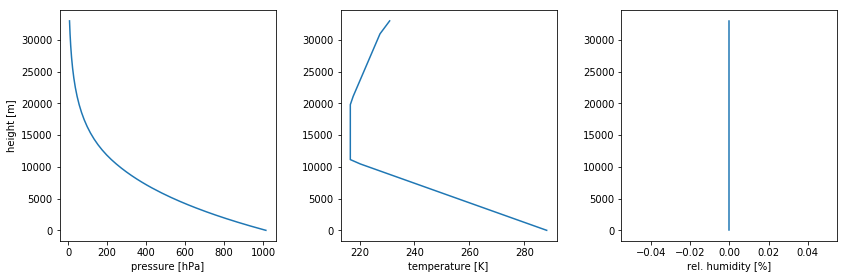

In [3]:
# plot profile
fig = plt.figure(figsize=[12,4])
fig.add_axes([0.1,0.1,0.25,0.8])
plt.plot(pam.p['press_lev'][0,0,:]/100.,pam.p['hgt_lev'][0,0,:])
plt.ylabel('height [m]')
plt.xlabel('pressure [hPa]')
fig.add_axes([0.425,0.1,0.25,0.8])
plt.plot(pam.p['temp_lev'][0,0,:],pam.p['hgt_lev'][0,0,:])
plt.xlabel('temperature [K]')
fig.add_axes([0.75,0.1,0.25,0.8])
plt.plot(pam.p['relhum_lev'][0,0,:],pam.p['hgt_lev'][0,0,:])
plt.xlabel('rel. humidity [%]')
plt.show()

In [7]:
# write standard atmosphere to file
#fname = '/home/nrisse/uniHome/WHK/eumetsat/data/atmosphere/standard_atmosphere.txt'
#data = np.array([pam.p['hgt_lev'][0,0,:], 
#                 pam.p['press_lev'][0,0,:]/100, 
#                 pam.p['temp_lev'][0,0,:], 
#                 pam.p['relhum_lev'][0,0,:],
#                ]).T
#np.savetxt(fname, data, delimiter=',', header='z [m], p [hPa], T [K], RH [%]')

In [8]:
for key, value in pam.p.items():
    print('{}: {}'.format(key, value))

wind_uv: [[[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
    nan  nan  nan  nan  nan  nan  nan  nan

In [3]:
df = 0.015
f_min = 183.31-12+0.007
f_max = 183.31+12+0.007

freqs = np.arange(f_min, f_max+df, df)[:10]  # 800 steps on each side of the line center 

pam.runParallelPamtra(freqs, pp_deltaX=1, pp_deltaY=1, pp_deltaF=5, pp_local_workers="auto")

In [4]:
pam.nmlSet

{'active': True,
 'add_obs_height_to_layer': False,
 'conserve_mass_rescale_dsd': True,
 'creator': 'Pamtrauser',
 'data_path': '$PAMTRA_DATADIR',
 'emissivity': 0.6,
 'file_desc': '',
 'gas_mod': 'R98',
 'hydro_adaptive_grid': True,
 'hydro_fullspec': False,
 'hydro_includehydroinrhoair': True,
 'hydro_limit_density_area': True,
 'hydro_softsphere_min_density': 10.0,
 'hydro_threshold': 1e-10,
 'lgas_extinction': True,
 'lhyd_absorption': True,
 'lhyd_emission': True,
 'lhyd_scattering': True,
 'liblapack': True,
 'liq_mod': 'TKC',
 'outpol': 'VH',
 'passive': True,
 'radar_airmotion': False,
 'radar_airmotion_linear_steps': 30,
 'radar_airmotion_model': 'constant',
 'radar_airmotion_step_vmin': 0.5,
 'radar_airmotion_vmax': 4.0,
 'radar_airmotion_vmin': -4.0,
 'radar_aliasing_nyquist_interv': 1,
 'radar_allow_negative_dD_dU': False,
 'radar_attenuation': 'disabled',
 'radar_convolution_fft': True,
 'radar_fwhr_beamwidth_deg': 0.31,
 'radar_integration_time': 1.4,
 'radar_k2': 0.93,
 

In [5]:
pam.set

{'att_npol': 1,
 'att_pol': ['N'],
 'freqs': array([ 171.317,  171.332,  171.347,  171.362,  171.377,  171.392,
         171.407,  171.422,  171.437,  171.452]),
 'namelist_file': 'TMPFILE',
 'nfreqs': 10,
 'pyVerbose': 0,
 'radar_npol': 1,
 'radar_pol': ['NN'],
 'verbose': 0}

In [9]:
pam.p['obs_height']

array([[[ 833000.,       0.]]])

In [ ]:
pam.p['groundtemp']